<a href="https://colab.research.google.com/github/Hars99/taptap_ass-1/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [10/200], Loss: 149.4562
Epoch [20/200], Loss: 133.0637
Epoch [30/200], Loss: 123.4879
Epoch [40/200], Loss: 117.2205
Epoch [50/200], Loss: 114.6469
Epoch [60/200], Loss: 108.5014
Epoch [70/200], Loss: 106.5087
Epoch [80/200], Loss: 101.8867
Epoch [90/200], Loss: 98.1887
Epoch [100/200], Loss: 102.8187
Epoch [110/200], Loss: 106.6715
Epoch [120/200], Loss: 95.9827
Epoch [130/200], Loss: 94.0523
Epoch [140/200], Loss: 94.2196
Epoch [150/200], Loss: 89.6230
Epoch [160/200], Loss: 91.2565
Epoch [170/200], Loss: 88.5245
Epoch [180/200], Loss: 86.3532
Epoch [190/200], Loss: 85.0877
Epoch [200/200], Loss: 87.0312
Test MSE: 0.3096


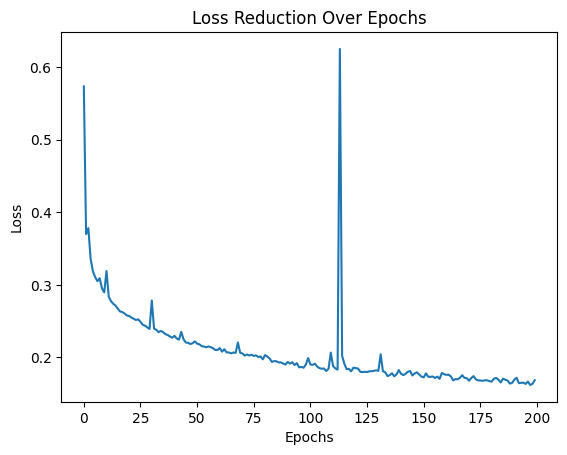

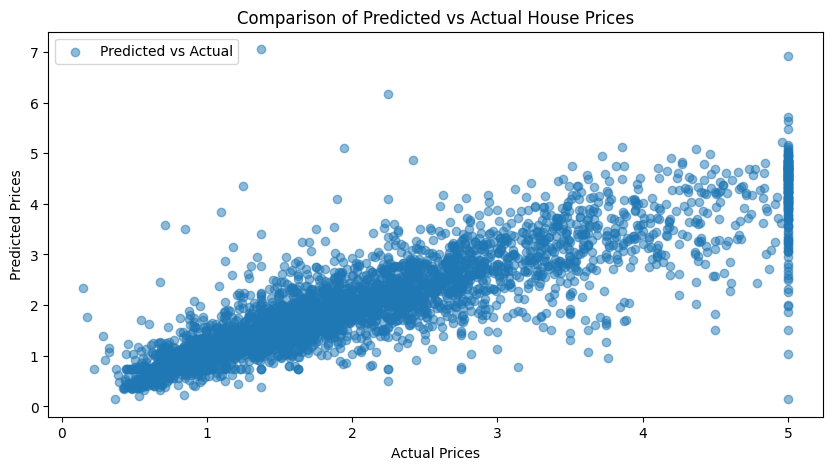

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Step 2: Preprocess the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Step 4: Define the regression model
class HousePriceModel(nn.Module):
    def __init__(self):
        super(HousePriceModel, self).__init__()
        self.layer1 = nn.Linear(X.shape[1], 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 32)
        self.layer4 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.leaky_relu = nn.LeakyReLU()

    def forward(self, x):
        x = self.leaky_relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.layer4(x)
        return x

# Step 5: Initialize the model, loss function, and optimizer
model = HousePriceModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

# Training parameters
epochs = 200
batch_size = 32
losses = []
num_samples = X_train_tensor.shape[0]

# Step 6: Train the model
for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0
    for i in range(0, num_samples, batch_size):
        X_batch = X_train_tensor[i:i+batch_size]
        y_batch = y_train_tensor[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    losses.append(epoch_loss / (num_samples // batch_size))

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}')

# Step 7: Evaluate the model
model.eval()
y_pred = model(X_test_tensor).detach().numpy()
test_loss = criterion(torch.tensor(y_pred), y_test_tensor).item()
print(f'Test MSE: {test_loss:.4f}')

# Step 8: Visualization of training loss
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Reduction Over Epochs')
plt.show()

# Step 9: Compare predicted vs actual house prices
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Comparison of Predicted vs Actual House Prices')
plt.legend()
plt.show()
